In [1]:

import cv2
from glob import glob
from natsort import natsorted
from MonlamOCR.Config import init_monlam_line_model, init_monlam_layout_model
from MonlamOCR.Inference import LineDetection, LayoutDetection
from MonlamOCR.Utils import binarize, read_line_model_config, read_layout_model_config, show_image, show_overlay

e:\Github\OCR-Deployment\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
kenlm python bindings are not installed. Most likely you want to install it using: pip install https://github.com/kpu/kenlm/archive/master.zip
kenlm python bindings are not installed. Most likely you want to install it using: pip install https://github.com/kpu/kenlm/archive/master.zip


In [2]:
data_path = "SampleData"
images = natsorted(glob(f"{data_path}/*.jpg"))
print(f"Images: {len(images)}")

Images: 2


SampleData\I8LS163330006.jpg


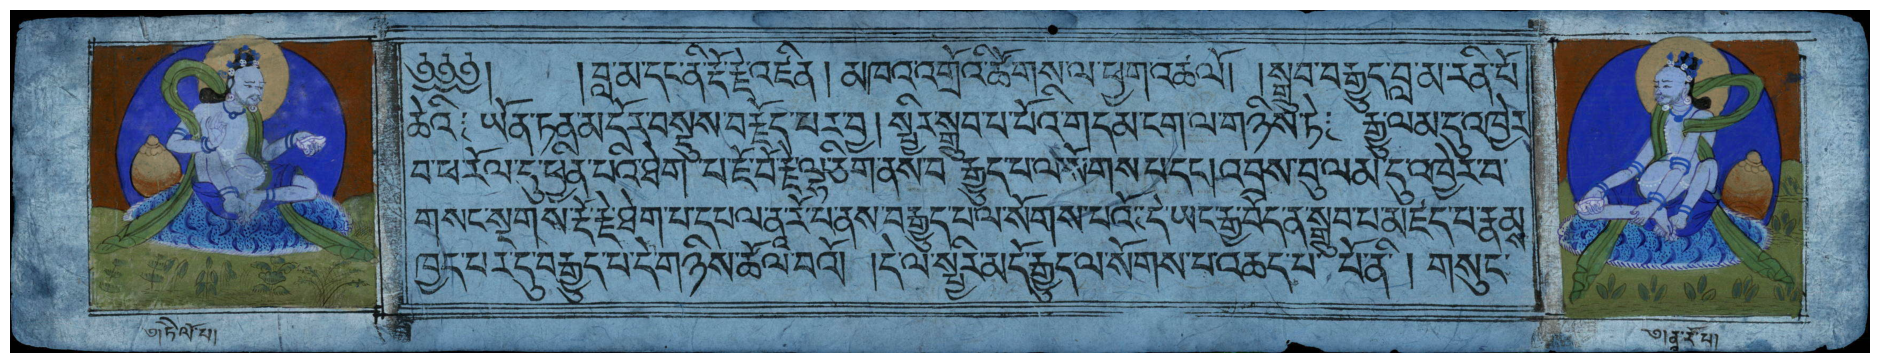

In [3]:
idx = 0
print(images[idx])
image = cv2.imread(images[idx])
show_image(image)

#### Test Inference Classes

In [4]:
### download line and layout detection models

line_model_config_file = init_monlam_line_model()
layout_model_config_file = init_monlam_layout_model()

line_model_config = read_line_model_config(line_model_config_file)
line_inference = LineDetection(line_model_config)

layout_model_config = read_layout_model_config(layout_model_config_file)
layout_inference = LayoutDetection(layout_model_config)

Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 1004.14it/s]
e:\Github\OCR-Deployment\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Layout Classes: ['background', 'image', 'line', 'margin', 'caption']


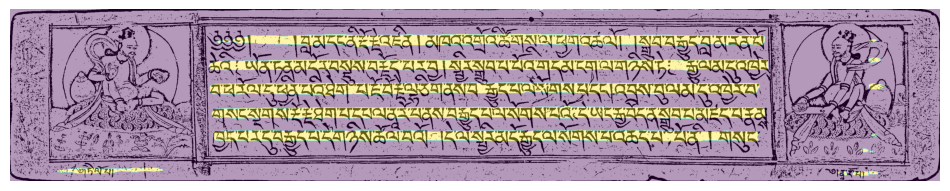

In [5]:
image = binarize(image)
line_mask = line_inference.predict(image)
show_overlay(image, line_mask, fig_x=12, fix_y=9)

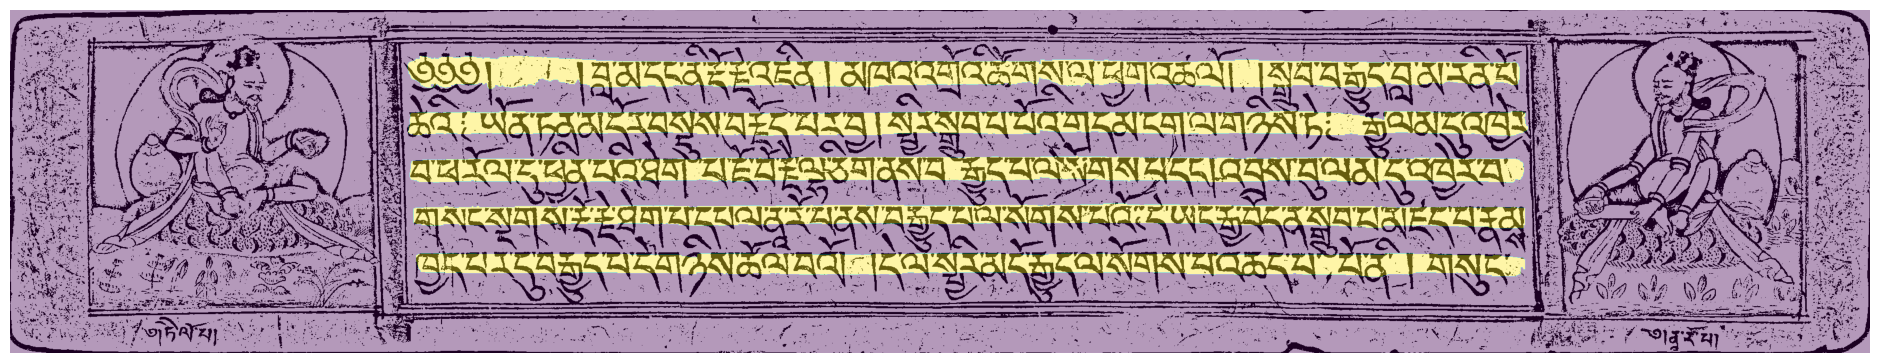

In [6]:
image = binarize(image)
layout_mask = layout_inference.predict(image, fix_height=False)

"""
Note: Use the following channels for the respective class as defined in the model config file:
0 = Background
1 = Images
2 = Lines
3 = Margins
4 = Captions
"""

show_overlay(image, layout_mask[:, :, 2])